In [39]:
# %load imports.py
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from interneuron_polarity.io.io import IO

In [110]:
def get_population_rate(spike_trains):
    isis = []
    for idx, spike_train in spike_trains.items():
        isis.append(np.ediff1d(spike_train))
    all_isis = np.hstack(isis)
    if all_isis.shape[0]==0:
        pop_rate = 0*hertz
    else:
        pop_rate = 1.0/np.mean(all_isis)*hertz
    return pop_rate

In [131]:
import matplotlib.pyplot as plt
from brian2.units import *
import numpy as np

def plot_spiking(n_ex, n_in, ex_spike_trains, in_spike_trains, t_start=None, t_end=None):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    for key, times in ex_spike_trains.items():
        ax.plot(times/ms, (n_ex+n_in-key)*np.ones(times.shape), 'b|')


    for key, times in in_spike_trains.items():
        ax.plot(times/ms, (n_in-key)*np.ones(times.shape), 'r|')

    
    ax.grid(axis='x') 
    if t_start is not None:
        ax.set_xlim(t_start,t_end)
    ax.set_ylim(0, n_ex+n_in)
    ax.set_xlabel("Time(ms)");

In [132]:
simulation_dir = "../simulations/2019-07-31-ellipsoid-morphology/"

In [133]:
my_io = IO(simulation_dir)

ex_spike_trains, in_spike_trains = my_io.load_spike_trains()

n_ex = len(ex_spike_trains.keys())
n_in = len(in_spike_trains.keys())
pop_rates =[get_population_rate(spike_trains) for spike_trains in [ex_spike_trains, in_spike_trains]]

In [134]:
pop_rates

[44.77004931 * hertz, 70.1958884 * hertz]

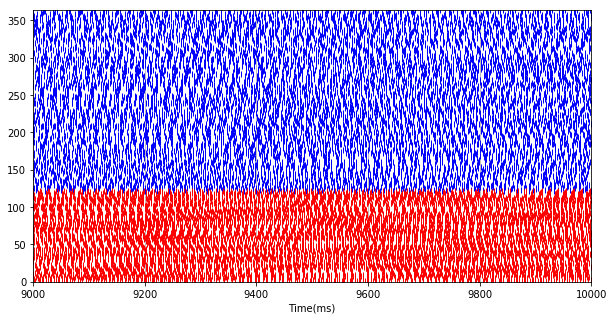

In [135]:
plot_spiking(n_ex, n_in, ex_spike_trains, in_spike_trains, t_start=9000, t_end=10000)